In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from matplotlib.patches import Rectangle

In [3]:
cancer_mutations = pd.read_csv("../../COSMIC/Census_allTue Nov 10 13_38_57 2020.csv")

In [4]:
driver_mutations = cancer_mutations["Gene Symbol"].tolist()

In [5]:
celllines_mapped = pd.read_csv("../MCF7_removal/Celllines_mapping_manual_noMCF7.csv")
celllines_mutations = pd.read_csv("../../GEMICCL/Mutation.csv", sep = "\t")

<ipython-input-5-dc7b46bc2940>:2: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  celllines_mutations = pd.read_csv("../../GEMICCL/Mutation.csv", sep = "\t")


In [6]:
# Get only cell lines with ID
celllines_mapped = celllines_mapped.drop_duplicates(subset = ["dsIdx"])
celllines_mapped = celllines_mapped.dropna(subset = ["ID"])
sample_data_tissue = celllines_mapped["DI"].tolist()

In [10]:
tissue_origin = pd.read_excel("../../Cellosaurus_data/Cellline_tissue_origin.xlsx", names = ["Cancer", "Origin"])
tissue_origin_dict = tissue_origin.set_index("Cancer")["Origin"].to_dict()

In [11]:
tissue_type = []
for item in sample_data_tissue:
    if pd.isnull(item):
        tissue_type.append("Unknown") 
    elif item == "[]":
        tissue_type.append("Unknown")
    else:
        item = item.split(";")[2].split("'")[0].strip()
        tissue_type.append(item)
        
cell_origin = [tissue_origin_dict.get(item) for item in tissue_type]
celllines_mapped["Tissue"] = cell_origin

In [12]:
celllines_list = celllines_mapped["ID"].unique().tolist()

In [13]:
celllines_notinmutationset = set(celllines_list) - set(celllines_mutations['CellLineName_Cellosaurus'])
celllines_mapped_mutations = celllines_mapped[~celllines_mapped["ID"].isin(celllines_notinmutationset)]

In [14]:
cellines_order = celllines_mapped_mutations.sort_values(by ="Tissue")["ID"].unique().tolist()

In [15]:
tissue_labelled = pd.get_dummies(celllines_mapped_mutations, columns=["Tissue"])

In [16]:
unique_celllines = celllines_mapped_mutations.drop_duplicates(subset = "ID")
unique_celllines = unique_celllines.sort_values(by = "Tissue")

In [17]:
cellline_order = unique_celllines["ID"].tolist()
tissue_order= unique_celllines["Tissue"].tolist()

In [18]:
celllines_mapped_mutations["ID"].unique()

array(['SHP-77', 'LUDLU-1', 'NCI-H446', 'Malme-3M', 'NCI-H1755',
       'NCI-H2135', 'HCC1187', 'COR-L88', 'NCI-H2171', 'NCI-H1155',
       'ChaGo-K-1', 'SNB-75', 'HOP-62', 'NCI-H1838', 'OVCAR-3',
       'MDA-MB-231', 'COR-L279', 'NCI-H1734', 'RPMI-8226', 'Calu-1',
       'Calu-3', 'KM12', 'HCC1937', 'MOLT-4',
       'HARA [Human squamous cell lung carcinoma]', 'COR-L23', 'SN12C',
       'UACC-62', 'HCC38', 'NCI-H226', 'MIA PaCa-2', 'CAL-51', 'NCI-H441',
       '786-O', 'SF295', 'HPAC', 'DMS 53', 'UMC-11', 'RXF 393L',
       'SK-MEL-2', 'DU145', 'J82', 'NCI-H2228', 'Hs 578T', '5637',
       'UACC-257', 'NCI-H1693', 'NCI-H2444', 'NCI-H209', 'NCI-H1993',
       'COLO 205', 'NCI-H510A', 'HCC1395', 'UM-UC-3', 'BT-549', 'HCC1806',
       'NCI-H2073', 'NCI-H2030', 'MDA-MB-436', 'NCI-H1975', 'MDA-MB-468',
       'NCI-H358', 'BT-20', 'NCI-H2170', 'NCI-H2291', 'NCI-H1703',
       'NCI-H520', 'NCI-H2172', 'HCC70', 'NCI-H522', 'LK-2', 'VM-CUB-1',
       'T-47D', 'NCI-H2085', 'NCI-H2122', 'NCI-H14

In [19]:
celllines_mapped = set(celllines_mapped_mutations["ID"].unique())
celllines_with_mutations = set(celllines_mutations["CellLineName_Cellosaurus"].unique())

In [20]:
mutations_in_celllines = celllines_mutations[celllines_mutations["CellLineName_Cellosaurus"].isin(celllines_mapped)]
mutations_in_celllines = mutations_in_celllines[mutations_in_celllines["MutationType_Raw"] != "Intron"]
mutations_in_celllines = mutations_in_celllines[mutations_in_celllines["MutationType"] != "Silent"]
mutations_in_celllines = mutations_in_celllines[mutations_in_celllines["MutationType"].notna()]
mutations_in_celllines = mutations_in_celllines[mutations_in_celllines["MutationType"] != "Unknown"]

In [21]:
mutations_in_celllines_drivers = mutations_in_celllines[mutations_in_celllines["HGNC"].isin(driver_mutations)]

In [22]:
mutations_in_celllines_drivers

,Source_Type,CellLineName_Cellosaurus,HGNC,Entrez,Chr,Chr_Start,Chr_End,Strand,CDS_Mutation,AA_Mutation,MutationType_Raw,MutationType,Mutation_Zygosity
20,CCLE,KM12,RBM15,64783.0,1,110882335,110882335,+,c.308C>T,p.S103F,Missense_Mutation,Missense,NaN
43,CCLE,NCI-H1793,RBM15,64783.0,1,110884321,110884321,+,c.2294C>A,p.S765Y,Missense_Mutation,Missense,NaN
62,CCLE,NCI-H446,MTOR,2475.0,1,11175509,11175509,+,c.7033A>G,p.M2345V,Missense_Mutation,Missense,NaN
72,CCLE,NCI-H1792,MTOR,2475.0,1,11187683,11187683,+,c.6214C>T,p.Q2072*,Nonsense_Mutation,Nonsense,NaN
83,CCLE,COR-L23,MTOR,2475.0,1,11188961,11188961,+,c.5762A>T,p.E1921V,Missense_Mutation,Missense,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904926,NCI60,HCT 116,KMT2C,58508.0,7,151960144,151960144,NaN,c.1256A>G,p.Q419R,Substitution - Missense,Missense,Heterozygous
904928,NCI60,HCT 116,KMT2D,8085.0,12,49434231,49434232,NaN,c.6511_6512insC,p.R2173fs*6,Insertion - Frameshift,Frame_Shift,Heterozygous
904951,NCI60,NCI-H23,KMT2D,8085.0,12,49428411,49428411,NaN,c.9584G>T,p.G3195V,Substitution - Missense,Missense,Heterozygous
904964,NCI60,SK-MEL-5,KMT2D,8085.0,12,49420934,49420934,NaN,c.14005G>A,p.E4669K,Substitution - Missense,Missense,Heterozygous


In [23]:
plotting_mutations_in_celllines = mutations_in_celllines_drivers[["HGNC", "MutationType"]]

In [37]:
len(mutations_in_celllines_drivers[mutations_in_celllines_drivers["HGNC"] == "TP53"]["CellLineName_Cellosaurus"].unique().tolist())

113

In [48]:
mutations_in_celllines_drivers[mutations_in_celllines_drivers["HGNC"] == "KRAS"]["AA_Mutation"].value_counts()

p.G12C     21
p.G12V     20
p.G12D     16
p.G13D     11
p.G12A      5
p.P121H     3
p.G12S      3
p.Q61K      2
p.L19F      2
p.G13C      2
p.D153V     2
p.G12F      1
p.Q61H      1
p.M188V     1
Name: AA_Mutation, dtype: int64

In [42]:
len(mutations_in_celllines_drivers[mutations_in_celllines_drivers["HGNC"] == "ATM"]["CellLineName_Cellosaurus"].unique().tolist())

26

In [24]:
grouped_mutationtype = pd.DataFrame(plotting_mutations_in_celllines.groupby(["HGNC", "MutationType"]).size()).sort_values(by = 0)

In [25]:
top_mutations = pd.DataFrame(plotting_mutations_in_celllines.groupby(["HGNC"]).size()).sort_values(by = 0, ascending = False).head(50)

In [26]:
grouped_mutations = plotting_mutations_in_celllines[plotting_mutations_in_celllines["HGNC"].isin(top_mutations.index.tolist())].groupby(["HGNC", "MutationType"]).size()

In [27]:
mutationorder = top_mutations.head(50).index.tolist()

In [28]:
stacked_barframe = grouped_mutations.unstack().reindex(mutationorder)

In [29]:
stacked_barframe

MutationType,Frame_Shift,In_Frame,Missense,Nonsense
HGNC,,,,
TP53,27.0,5.0,174.0,35.0
LRP1B,4.0,NaN,170.0,23.0
CSMD3,12.0,NaN,162.0,12.0
PDE4DIP,86.0,NaN,48.0,4.0
MUC16,13.0,NaN,109.0,9.0
MAP3K1,NaN,106.0,10.0,3.0
RECQL4,101.0,NaN,11.0,NaN
AKAP9,10.0,61.0,31.0,NaN
KRAS,NaN,NaN,90.0,NaN


In [28]:
plt.rcParams['figure.figsize'] = [12, 12]

In [29]:
stacked_barframe = stacked_barframe.fillna(0)

In [30]:
stacked_barframe["Plot_In_Frame"] = stacked_barframe["In_Frame"] + stacked_barframe["Frame_Shift"]
stacked_barframe["Plot_Missense"] = stacked_barframe["Plot_In_Frame"] + stacked_barframe["Missense"]
stacked_barframe["Plot_Nonsense"] = stacked_barframe["Plot_Missense"] + stacked_barframe["Nonsense"]

Text(0, 0.5, '')

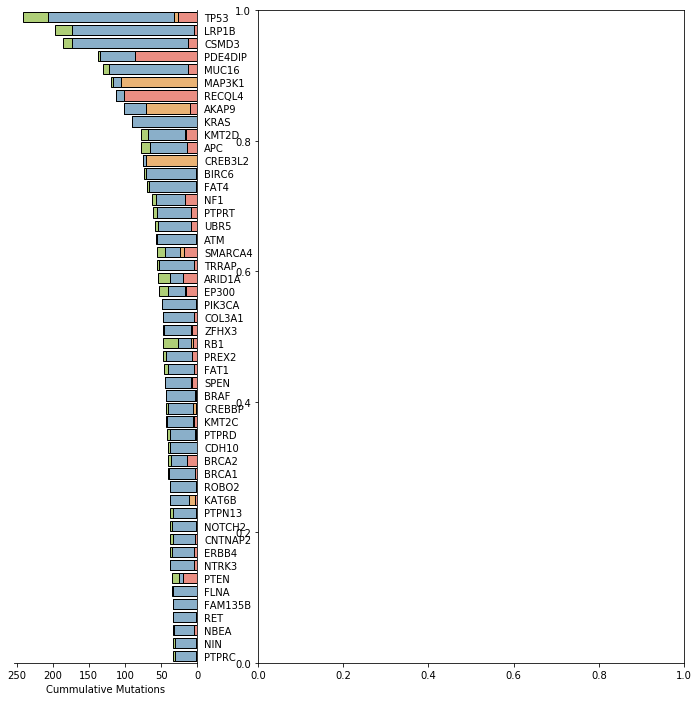

In [31]:
f, (ax_left, ax_right) = plt.subplots(1,2, gridspec_kw={"width_ratios": (.3, .7)})

g1 = sns.barplot(x = stacked_barframe["Frame_Shift"],y = stacked_barframe.index, color = sns.color_palette("Set3")[3]
                ,linewidth = 1, edgecolor = "k", zorder = 5, ax = ax_left)
g2 = sns.barplot(x = stacked_barframe["Plot_In_Frame"], y = stacked_barframe.index, color = sns.color_palette("Set3")[5]
                 ,linewidth = 1, edgecolor = "k", zorder = 4, ax = ax_left)
g3 = sns.barplot(x = stacked_barframe["Plot_Missense"], y = stacked_barframe.index, color = sns.color_palette("Set3")[4]
                 ,linewidth = 1, edgecolor = "k", zorder = 3, ax = ax_left)
g4 = sns.barplot(x = stacked_barframe["Plot_Nonsense"], y = stacked_barframe.index, color = sns.color_palette("Set3")[6]
                 ,linewidth = 1, edgecolor = "k", zorder = 2, ax = ax_left)

ax_left.set_xlim(reversed(g4.get_xlim()))

g4.yaxis.set_label_position("right")
g4.yaxis.tick_right()
sns.despine(left = True, bottom = False, right = False, ax = ax_left)
g4.set_xlabel("Cummulative Mutations")
g4.set_ylabel("")

In [32]:
stacked_barframe.to_csv("Top50mutations_stats.csv")

In [33]:
oncoprint_data = mutations_in_celllines_drivers[["CellLineName_Cellosaurus","HGNC", "MutationType"]]

In [34]:
frame_shift_array_array = []
in_frame_array_array = []
missense_array_array = []
nonsense_array_array =[]
for item in cellline_order:
    frame_shift_array = []
    in_frame_array = []
    missense_array = []
    nonsense_array =[]
    
    cellline = (oncoprint_data[oncoprint_data["CellLineName_Cellosaurus"] == item])
    for geneid in stacked_barframe.index.tolist():
        mutationlist = cellline[cellline["HGNC"] == geneid]
        #if((mutationlist.shape[0]) == 0):
            #frame_shift_array.append(0)
            #in_frame_array.append(0)
            #missense_array.append(0)
            #nonsense_array.append(0)
        mutationtype = mutationlist["MutationType"].tolist()
        #if len(set(mutationtype)) >= 2:
        #    print(set(mutationtype))
        if "Frame_Shift" in mutationtype:
            frame_shift_array.append(1)
        else:
            frame_shift_array.append(0)
        if "In_Frame" in mutationtype:
            in_frame_array.append(1)
        else:
            in_frame_array.append(0)
        if "Missense" in mutationtype:
            missense_array.append(1)
        else:
            missense_array.append(0)
        if "Nonsense" in mutationtype:
            nonsense_array.append(1)
        else:
            nonsense_array.append(0)

    frame_shift_array_array.append(pd.Series(frame_shift_array))
    in_frame_array_array.append(pd.Series(in_frame_array))
    missense_array_array.append(pd.Series(missense_array))
    nonsense_array_array.append(pd.Series(nonsense_array))

In [35]:
list1 = pd.Series([0,1,2,3,4])
list2 = pd.Series([5,6,7,8,9])

In [36]:
cellline_frameshift_array = pd.concat(frame_shift_array_array, axis =1)
cellline_inframe_array = pd.concat(in_frame_array_array, axis =1)
cellline_missense_array = pd.concat(missense_array_array, axis =1)
cellline_nonsense_array = pd.concat(nonsense_array_array, axis =1)

In [37]:
cellline_frameshift_array.columns = cellline_order
cellline_frameshift_array.index = stacked_barframe.index

cellline_inframe_array.columns = cellline_order
cellline_inframe_array.index = stacked_barframe.index

cellline_missense_array.columns = cellline_order
cellline_missense_array.index = stacked_barframe.index

cellline_nonsense_array.columns = cellline_order
cellline_nonsense_array.index = stacked_barframe.index

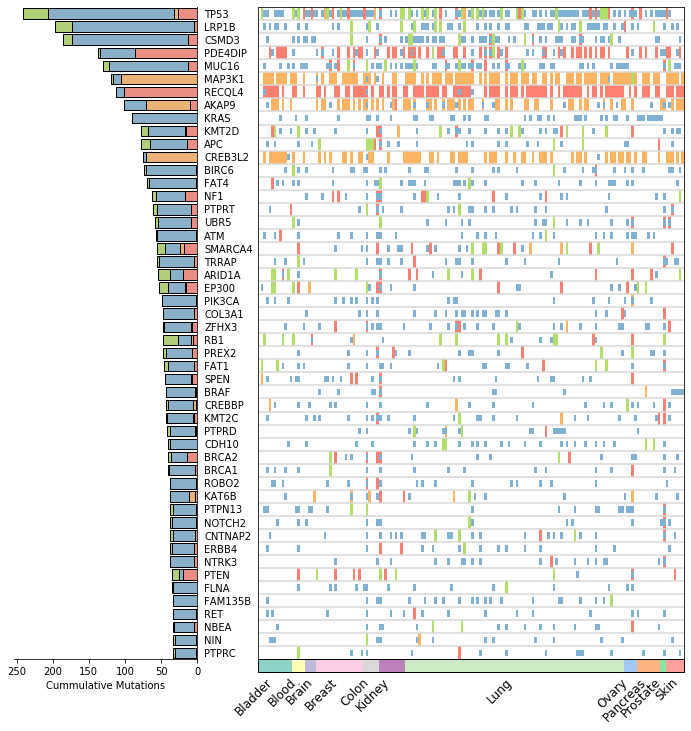

In [39]:
adapted_colorpalette = sns.color_palette(sns.color_palette("Set3", n_colors=11)[:3] + sns.color_palette(sns.color_palette("Set3", n_colors=11)[-4:]) + sns.color_palette("pastel", n_colors=11))
f, (ax_left, ax_right) = plt.subplots(1,2, gridspec_kw={"width_ratios": (.3, .7)})

g1 = sns.barplot(x = stacked_barframe["Frame_Shift"],y = stacked_barframe.index, color = sns.color_palette("Set3")[3]
                ,linewidth = 1, edgecolor = "k", zorder = 5, ax = ax_left)
g2 = sns.barplot(x = stacked_barframe["Plot_In_Frame"], y = stacked_barframe.index, color = sns.color_palette("Set3")[5]
                 ,linewidth = 1, edgecolor = "k", zorder = 4, ax = ax_left)
g3 = sns.barplot(x = stacked_barframe["Plot_Missense"], y = stacked_barframe.index, color = sns.color_palette("Set3")[4]
                 ,linewidth = 1, edgecolor = "k", zorder = 3, ax = ax_left)
g4 = sns.barplot(x = stacked_barframe["Plot_Nonsense"], y = stacked_barframe.index, color = sns.color_palette("Set3")[6]
                 ,linewidth = 1, edgecolor = "k", zorder = 2, ax = ax_left)

ax_left.set_xlim(reversed(g4.get_xlim()))

g4.yaxis.set_label_position("right")
g4.yaxis.tick_right()
sns.despine(left = True, bottom = False, right = False, ax = ax_left)
g4.set_xlabel("Cummulative Mutations")
g4.set_ylabel("")

rowcount = 1
numberofrows = len(cellline_frameshift_array.index)
numberofcolumns = len(cellline_frameshift_array.columns)
for index,row in cellline_frameshift_array.iterrows():
    columncount = 1
    for column in row:
        if column == 1:
            plt.gca().add_patch(Rectangle(((1/numberofcolumns)*columncount,1-(1/numberofrows)*rowcount),(1/numberofcolumns),(1/numberofrows),facecolor=sns.color_palette("Set3")[3]))
        columncount += 1
    rowcount += 1
    
rowcount = 1
numberofrows = len(cellline_inframe_array.index)
numberofcolumns = len(cellline_inframe_array.columns)
for index,row in cellline_inframe_array.iterrows():
    columncount = 1
    for column in row:
        if column == 1:
            plt.gca().add_patch(Rectangle(((1/numberofcolumns)*columncount,1-(1/numberofrows)*rowcount),(1/numberofcolumns),(1/numberofrows),facecolor=sns.color_palette("Set3")[5]))
        columncount += 1
    rowcount += 1    

rowcount = 1
numberofrows = len(cellline_missense_array.index)
numberofcolumns = len(cellline_missense_array.columns)
for index,row in cellline_missense_array.iterrows():
    columncount = 1
    for column in row:
        if column == 1:
            plt.gca().add_patch(Rectangle(((1/numberofcolumns)*columncount,(1-(1/numberofrows)*rowcount)+(1/numberofrows)/4),(1/numberofcolumns),(1/numberofrows)/2,facecolor=sns.color_palette("Set3")[4]))
        columncount += 1
    rowcount += 1        
    
rowcount = 1
numberofrows = len(cellline_nonsense_array.index)
numberofcolumns = len(cellline_nonsense_array.columns)
for index,row in cellline_nonsense_array.iterrows():
    if rowcount != len(cellline_nonsense_array.index):
        ax_right.axhline((1/numberofrows)*rowcount, c = "#d8d8d8")
    columncount = 1
    for column in row:
        if column == 1:
            plt.gca().add_patch(Rectangle(((1/numberofcolumns)*columncount,(1-(1/numberofrows)*rowcount)),(1/numberofcolumns),(1/numberofrows),facecolor=sns.color_palette("Set3")[6]))
        
        columncount += 1
    rowcount += 1  

ax_right.set_xticks([])
ax_right.set_yticks([])
    
#plt.gca().add_patch(Rectangle((0.2,0.4),0.4,0.6,facecolor='red'))
label = 1
classnames, indices = np.unique(tissue_order, return_inverse=True)
for item in indices:
    ax_right.add_patch(Rectangle(((1/numberofcolumns)*(label-1),0),(1/numberofcolumns),-(1/numberofrows)
                                  ,facecolor=adapted_colorpalette[item], clip_on = False))
    label+=1
ax_right.add_patch(Rectangle((0,0),1, -(1/numberofrows), facecolor = "none", lw = 1, edgecolor = "k",
                  clip_on = False))
lengthcum = 0
count = 0
for item in classnames:
    length = np.where(classnames[indices] == item)[0].shape[0]
    if count in [2, 10]:
        fudge = (1/numberofcolumns)*2
    else:
        fudge = 0
    ax_right.annotate(item, ((1/numberofcolumns)*(length/2) + lengthcum + fudge, (-(1/numberofrows)*1.25))
                      , annotation_clip= False, rotation = 45, ha = "right", va = "top", size = 12)
    lengthcum += (1/numberofcolumns)*length
    count+=1
    
plt.savefig("Oncoprint_celllines.pdf")